In [10]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

from models.clustering import *
from models.regression import *

## Linear Regression

In [11]:
n = 10000
p = 4

x_data = pd.DataFrame(np.random.rand(n, p) * 10, columns=["x"+str(i) for i in range(1, p+1)])
x_data = x_data.assign(x0=1)

true_beta = np.random.rand(p + 1) * 3

y = pd.Series(np.random.rand(n)) + x_data.mul(true_beta).sum(axis=1)

In [12]:
reg = LinearRegression(x_data.drop("x0", axis=1), y, True)
reg.fit(eta=0.01, verbose=400, epochs=1500, decay_f=1.5, lr_update=250)

Epoch: 0; MSE: 569.49985421471
Learning updated to 0.006666666666666667 at Epoch: 0


Learning updated to 0.0044444444444444444 at Epoch: 250


Epoch: 400; MSE: 0.08479786359712525
Learning updated to 0.002962962962962963 at Epoch: 500


Learning updated to 0.0019753086419753087 at Epoch: 750


Epoch: 800; MSE: 0.08401714188897098
Learning updated to 0.0013168724279835392 at Epoch: 1000


Epoch: 1200; MSE: 0.08372152440719752
Learning updated to 0.0008779149519890262 at Epoch: 1250




In [13]:
reg.beta, true_beta

(array([1.8334334 , 1.11629644, 2.95304298, 0.45850336, 0.85097691]),
 array([1.84012391, 1.1234811 , 2.95977425, 0.46535652, 0.20775918]))

## K-Means Clustering

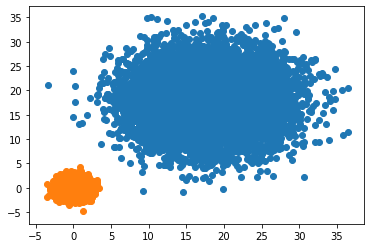

In [14]:
n_cluster1 = 10000
n_cluster2 = 5000

n_attr = 2

cols = ["x" + str(i) for i in range(n_attr)]
x_data = pd.concat([
    pd.DataFrame(np.random.randn(n_cluster1, n_attr) * 5 + 18, columns=cols).assign(cluster=0),
    pd.DataFrame(np.random.randn(n_cluster2, n_attr), columns=cols).assign(cluster=1)
])

clusters = x_data.cluster

plt_clusters(x_data)

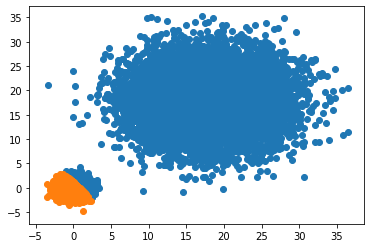

Converged after 3 iterations!



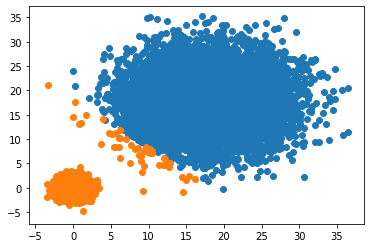

[[ 0.09210477  0.08006438]
 [18.09051937 18.12178677]]


In [19]:
clf = KMeans(x_data.drop("cluster", axis=1, errors="ignore"))
clf.fit(n_clusters=2, verbose=50)

In [20]:
clf.c_centres, x_data.groupby("cluster").mean().values

(array([[ 0.09210477,  0.08006438],
        [18.09051937, 18.12178677]]), array([[1.80421433e+01, 1.80711031e+01],
        [1.24723734e-02, 4.62288120e-03]]))